# Trigonometric interpolation + FFT

In [1]:
import warnings
import time

import numpy as np

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

---

## Problem

Based on _Introduction to numerical analysis_ by J. Stoer & R. Bulirsch, sections 2.3.1, 2.3.2, p. 72 - 84.

Interpolation for grid of $N$ points using periodic function:

\begin{split}
    \Psi(x) &= \frac{A_0}{2} + \sum_{h=1}^M \big(A_h \cos hx + B_h \sin hx \big), \quad &N = 2M+1\\
    \Psi(x) &= \frac{A_0}{2} + \sum_{h=1}^{M-1} \big(A_h \cos hx + B_h \sin hx \big) + \frac{A_m}{2} \cos Mx, \quad &N = 2M,
\end{split}

where $M \in \mathbb{N}$. Using De Moivre formula

$$ e^{kix} = \cos kx + i \sin kx $$

we can employ alternative interpolation task that uses _phase polynomial_, which is limited however to uniform partitions of the interval $[0, 2\pi]$:

$$p(x) = \beta_0 + \beta_1 \cdot e^{ix} + \ldots + \beta_{N-1} \cdot e^{(N-1)ix}.$$

From here we will be considering only cases when the partition is uniform.

**Theorem** For a phase polynomial $p(x) = \sum_{j=0}^{N-1} \beta_j \cdot e^{jix}$ we have

$$ p(x_k) = f_k, \qquad k = 0, 1, \ldots, N-1, $$

for complex $f_k$ and $x_k = \frac{2\pi k}{N}$ if and only if

$$ \beta_j = \frac{1}{N} \sum_{k=0}^{N-1} f_k e^{-2 \pi i j k / N}, \qquad j=0, 1, \ldots, N-1. $$

**Theorem** With $x_k = \frac{2 \pi k}{N}$ we have

$$ \Psi(x_k) = f_k, \qquad k = 0, 1, \ldots, N-1 $$

if and only with

\begin{split}
    A_h &= \frac{2}{N} \sum_{k=0}^{N-1} f_k \cos \frac{2 \pi h k}{N}, \qquad &h=0, 1, \ldots, M,\\
    B_h &= \frac{2}{N} \sum_{k=0}^{N-1} f_k \sin \frac{2 \pi h k}{N}, \qquad &h=1, 2, \ldots, M.\\
\end{split}

Phase polynomial coefficients

$$ \beta_j = \frac{1}{N} \sum_{k=0}^{N-1} f_k e^{-2 \pi i j k / N} $$

are discrete approximations some Fourier transform. Hence the need for ,,fast" algorithms (**FFT**s).

_Cooley-Tukey_ method:
* Recurrent algorithm,
* $N = 2^n, \qquad n>0$,
* Can be generalized for $N = N_1 N_2 \ldots N_n$,
* Time complexity $\mathcal{O}(N \log N)$, not $\mathcal{O}(N^2)$.

---

## Example

$N = 4$

$M = 2$

Let

$$f(x) = \sin(3x) + \cos(5x) - \cos(7x) - 1.5$$

$$x_) = 0, \quad x_1 = \frac{\pi}{2}, \quad x_2 = \pi, \quad x_3 = \frac{3}{2}\pi$$

Then

\begin{split}
    f_0 &= f(x_0) = \sin(0) + \cos(0) - \cos(0) - 1.5 = 0 + 1 - 1 -1.5 = -1.5\\
    f_1 &= f(x_1) = \sin(3\frac{\pi}{2}) + \cos(5\frac{\pi}{2}) - \cos(7\frac{\pi}{2}) - 1.5 = -1 + 0 - 0 -1.5 = -2.5\\
    f_2 &= f(x_2) = \sin(3\pi) + \cos(5\pi) - \cos(7\pi) - 1.5 = 0 + (-1) - (-1) -1.5 = -1.5\\
    f_3 &= f(x_3) = \sin(3 \cdot \frac{3}{2}\pi) + \cos(5 \cdot \frac{3}{2}\pi) - \cos(7 \cdot \frac{3}{2}\pi) - 1.5 = 1 + 0 - 0 -1.5 = -0.5
\end{split}

### "Trigonometric" polynomial

\begin{split}
    A_0 &= \frac{2}{4} \sum_{k=1}^{4-1} f_k \cos \frac{2\pi 0 k}{4} = \frac{1}{2} \Big( -1.5 \cos(0) -2.5 \cos(0)- 1.5 \cos(0) - 0.5 \cos(0) \Big)\\
    &= \frac{1}{2} \Big(-1.5 -2.5 -1.5 -0.5 \Big) = -3\\
    A_1 &= \frac{2}{4} \sum_{k=1}^{4-1} f_k \cos \frac{2\pi k}{4} = \frac{1}{2} \Big( -1.5 \cos(0) -2.5 \cos(\frac{\pi}{2} )- 1.5 \cos(\pi) - 0.5 \cos(\frac{3}{2}\pi) \Big)\\
    &= \frac{1}{2} \Big(-1.5 -0 +1.5 -0 \Big) = 0\\
    A_2 &= \frac{2}{4} \sum_{k=1}^{4-1} f_k \cos \frac{2\pi 2 k}{4} = \frac{1}{2} \Big( -1.5 \cos(0) -2.5 \cos(\pi)- 1.5 \cos(2\pi) - 0.5 \cos(3\pi) \Big)\\
    &= \frac{1}{2} \Big(-1.5 +2.5 -1.5 +0.5 \Big) = 0\\
    B_1 &= \frac{2}{4} \sum_{k=1}^{4-1} f_k \sin \frac{2\pi k}{4} = \frac{1}{2} \Big( -1.5 \sin(0) -2.5 \sin(\frac{\pi}{2} )- 1.5 \sin(\pi) - 0.5 \sin(\frac{3}{2}\pi) \Big)\\
    &= \frac{1}{2} \Big(0 -2.5 -0 +0.5 \Big) = -1
\end{split}

$B_2$ not needed.

$$\Psi(x) = \frac{A_0}{2} + \sum_{h=1}^{2-1} \big(A_h \cos hx + B_h \sin hx \big) + \frac{A_2}{2} \cos Mx = - \frac{3}{2} - \sin(x)$$

### Phase polynomial

\begin{split}
    \beta_0 &= \frac{1}{4} \sum_{k=0}^{4-1} f_k e^{-2\pi i 0 k / 4} = \frac{1}{4} \Big( -1.5 - 2.5 - 1.5 - 0.5 \Big) = -\frac{3}{2}\\
    \beta_1 &= \frac{1}{4} \sum_{k=0}^{4-1} f_k e^{-2\pi i 1 k / 4} = \frac{1}{4} \Big( -1.5 + 2.5i + 1.5 - 0.5i \Big) = \frac{1}{2}i\\
    \beta_2 &= \frac{1}{4} \sum_{k=0}^{4-1} f_k e^{-2\pi i 2 k / 4} = \frac{1}{4} \Big( -1.5 + 2.5 - 1.5 + 0.5 \Big) = 0\\
    \beta_3 &= \frac{1}{4} \sum_{k=0}^{4-1} f_k e^{-2\pi i 3 k / 4} = \frac{1}{4} \Big( -1.5 - 2.5i + 1.5 + 0.5i \Big) = -\frac{1}{2}i
\end{split}

$$p(x) = -\frac{3}{2} + \frac{1}{2}i \cdot e^{ix} - \frac{1}{2}i \cdot e^{3ix}$$

### Example function

In [2]:
def f(x):
    return np.sin(3.0*x) + np.cos(5.0*x) - np.cos(7.0*x) - 1.5

In [3]:
def psi(x):
    return -1.5 - np.sin(x)
def p(x):
    return -1.5 + 0.5*(0.0+1.0j)*np.exp((0.0+1.0j)*x) - 0.5*(0.0+1.0j)*np.exp(3.0*(0.0+1.0j)*x)

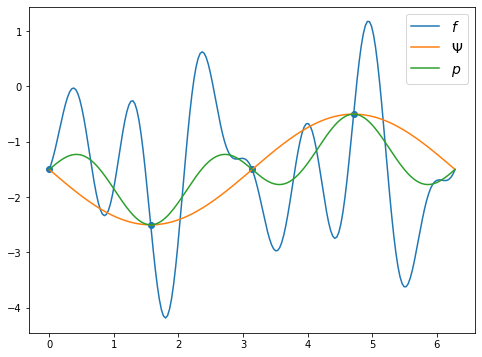

In [4]:
xs = np.linspace(0.0, 2.0*np.pi, 200)
xs_interp = np.array([0.0, np.pi/2.0, np.pi, np.pi*1.5])

fs   = f(xs)
psis = psi(xs)
ps   = p(xs)
pts  = f(xs_interp)

plt.figure(figsize=(8, 6))
plt.plot(xs, fs, label='$f$')
plt.plot(xs, psis, label='$\Psi$')
plt.plot(xs, ps, label='$p$')
plt.scatter(xs_interp, pts)
plt.legend(fontsize=14)

# plt.savefig("example.jpg", bbox_inches="tight")

---

## Implementations

### "Trigonometric" polynomial

In [5]:
class TrigPolynomial:
    def __init__(self):
        self.y      = None
        self.N      = None
        self.M      = None
        self.xk     = None
        self.A      = None
        self.B      = None
        
    def save_support_points(self, y):
        self.y = y
        self.N = y.shape[0]
        self.xk = 2.0*np.pi*np.arange(self.N)/self.N
    
    def find_coeffs(self):
        self.M = self.N // 2
        self.A = 2.0/self.N * np.sum(self.y*np.cos(np.arange(self.M + 1)[:, np.newaxis]*self.xk), axis=1)
        self.B = 2.0/self.N * np.sum(self.y*np.sin(np.arange(self.M + 1)[:, np.newaxis]*self.xk), axis=1)
    
    def find_coeffs_eval_time(self):
        start_time = time.time()
        self.find_coeffs()
        end_time = time.time()
        return end_time - start_time
    
    def error(self):
        return np.max(np.abs(self.__call__(self.xk) - self.y))
    
    def __call__(self, x):
        if self.N % 2 == 1:
            return self.A[0]/2.0 + np.sum(self.A[1:]*np.cos(np.arange(1, self.M + 1, dtype=np.float32)*x[:, np.newaxis])
                                          + self.B[1:]*np.sin(np.arange(1, self.M + 1, dtype=np.float32)*x[:, np.newaxis]), axis=1)
        else:
            return self.A[0]/2.0 + np.sum(self.A[1:-1]*np.cos(np.arange(1, self.M, dtype=np.float32)*x[:, np.newaxis])
                                          + self.B[1:-1]*np.sin(np.arange(1, self.M, dtype=np.float32)*x[:, np.newaxis]), axis=1) + self.A[self.M]/2.0 * np.cos(self.M*x)

### Phase polynomial

In [6]:
class PhasePolynomial:
    def __init__(self):
        self.y      = None
        self.N      = None
        self.xk     = None
        self.coeffs = None
        self.n      = None
    
    def save_support_points(self, y):
        self.y = y
        self.N = y.shape[0]
        self.xk = 2.0*np.pi*np.arange(self.N)/self.N
    
    def find_coeffs_dummy(self):
        self.coeffs = 1.0/self.N * np.sum(self.y*np.exp(-(0.0+1.0j)*np.arange(self.N)[:, np.newaxis]*self.xk), axis=1)
    
    def find_coeffs_dummy_eval_time(self):
        start_time = time.time()
        self.find_coeffs_dummy()
        end_time = time.time()
        return end_time - start_time
    
    def find_coeffs_Cooley_Tukey(self):
        N_bin = bin(self.N)[2:]
        assert all([digit == '0' for digit in N_bin[1:]]), "Number of support points must be a power of 2 for T-C algorithm."
        self.n = len(N_bin) - 1
        
        def bit_reversal(t):
            bin_rep_t = np.array(tuple((bin(t)[2:].zfill(self.n))), dtype=int)
            return np.sum(bin_rep_t*np.power(2, np.arange(self.n), dtype=int))
        
        coeffs = np.empty(self.N, dtype=np.complex64)
        for k in range(self.N):
            coeffs[bit_reversal(k)] = self.y[k]
        
        for m in range(1, self.n + 1):
            for j in range(0, 2**(m - 1) - 1 + 1):
                e = np.exp(-2.0*np.pi*(0.0+1.0j)*j/(2**m))
                for r in range(0, 2**self.n - 1 + 1, 2**m):
                    u = coeffs[r+j]
                    v = coeffs[r + j + 2**(m - 1)] * e
                    coeffs[r+j] = u + v
                    coeffs[r + j + 2**(m - 1)] = u - v
        self.coeffs = 1.0/self.N * coeffs
        
    def find_coeffs_Cooley_Tukey_eval_time(self):
        start_time = time.time()
        self.find_coeffs_Cooley_Tukey()
        end_time = time.time()
        return end_time - start_time
    
    def error(self):
        return np.max(np.abs(self.__call__(self.xk) - self.y))
    
    def __call__(self, x):
        if isinstance(x, np.ndarray):
            return np.sum(self.coeffs*np.exp(np.arange(self.coeffs.shape[0])*(0.0+1.0j)*x[:, np.newaxis]), axis=1)
        return np.sum(self.coeffs*np.exp(np.arange(self.coeffs.shape[0])*(0.0+1.0j)*x))

---

## Analysis

### Auxiliary functions

In [7]:
def plot_function(f, res=300, range_=(0.0, 2.0*np.pi)):
    xs = np.linspace(range_[0], range_[1], num=res)
    ys = f(xs)
    plt.plot(xs, ys)

def plot_support(x, y):
    plt.scatter(x, y)

In [8]:
def evaluate_and_plot_all_with_error(poly_class, f, N, type_='trig'):
    x = 2.0*np.pi*np.arange(N)/N
    y = f(x)
    
    poly = poly_class()
    poly.save_support_points(y)
    if type_ == 'trig':
        poly.find_coeffs()
    elif type_ == 'dummy':
        poly.find_coeffs_dummy()
    else:
        poly.find_coeffs_Cooley_Tukey()
    
    print(f"Error of the {type_} interpolation: {poly.error()}")
    
    plot_function(f)
    plot_function(poly)
    plot_support(x, y)

In [9]:
def find_3_times(f, start=1, end=10):
    trig_times = []
    phase_dummy_times = []
    phase_CT_times = []
    
    Ns = 2**(np.arange(start, end))
    for N in Ns:
        x = 2.0*np.pi*np.arange(N)/N
        y = f(x)
        trig_poly   = TrigPolynomial()
        phase_poly1 = PhasePolynomial()
        phase_poly2 = PhasePolynomial()

        trig_poly.save_support_points(y)
        phase_poly1.save_support_points(y)
        phase_poly2.save_support_points(y)
        
        trig_times.append(trig_poly.find_coeffs_eval_time())
        phase_dummy_times.append(phase_poly1.find_coeffs_dummy_eval_time())
        phase_CT_times.append(phase_poly2.find_coeffs_Cooley_Tukey_eval_time())
    
    return Ns, trig_times, phase_dummy_times, phase_CT_times

In [10]:
def plot_3_times(prev_fun_res):
    Ns, trig_times, phase_dummy_times, phase_CT_times = prev_fun_res
    
    plt.figure(figsize=(9, 9))
    plt.plot(Ns, trig_times, 'b-', linewidth=4, label='Trig')
    plt.plot(Ns, phase_dummy_times, 'r-', linewidth=4, label='Phase dummy')
    plt.plot(Ns, phase_CT_times, 'g-', linewidth=4, label='Phase C-T')
    
    plt.ylabel('Time ($s$)', fontsize=24)
    plt.xlabel('N', fontsize=24)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.legend(fontsize=20)

In [11]:
def find_1_time(f, polynomial, Ns, t_c=False):
    times = []
    
    for N in Ns:
        x = 2.0*np.pi*np.arange(N)/N
        y = f(x)
        poly = polynomial()

        poly.save_support_points(y)
        
        if isinstance(poly, TrigPolynomial):
            time = poly.find_coeffs_eval_time()
        elif t_c:
            time = poly.find_coeffs_Cooley_Tukey_eval_time()
        else:
            time = poly.find_coeffs_dummy_eval_time()
        
        times.append(time)
    
    return Ns, times

In [12]:
def plot_3_times_better(prev_fun_res1, prev_fun_res2, prev_fun_res3, labels=['Trig', 'Phase dummy', 'Phase C-T']):
    trig_Ns, trig_times = prev_fun_res1
    phase_dummy_Ns, phase_dummy_times = prev_fun_res2
    phase_CT_Ns, phase_CT_times = prev_fun_res3
    
    plt.figure(figsize=(21, 6))
    
    plt.subplot(1, 3, 1)
    plt.ylabel('Time ($s$)', fontsize=24)
    plt.yticks(fontsize=16)
    plt.plot(trig_Ns, trig_times, 'b-', linewidth=4, label=labels[0])
    plt.legend(loc='upper left', fontsize=22)
    plt.subplot(1, 3, 2)
    plt.plot(phase_dummy_Ns, phase_dummy_times, 'r-', linewidth=4, label=labels[1])
    plt.legend(loc='upper left', fontsize=22)
    plt.subplot(1, 3, 3)
    plt.plot(phase_CT_Ns, phase_CT_times, 'g-', linewidth=4, label=labels[2])
    plt.legend(loc='upper left', fontsize=22)

### Comparing results

Error of the trig interpolation: 4.440892098500626e-16
Error of the dummy interpolation: 2.869879072603736e-16

Error of the trig interpolation: 4.440892098500626e-16
Error of the dummy interpolation: 4.784432419734976e-16

Error of the trig interpolation: 4.440892098500626e-16
Error of the dummy interpolation: 1.477899152183274e-15

Error of the trig interpolation: 8.881784197001252e-16
Error of the dummy interpolation: 1.0001129040831337e-15



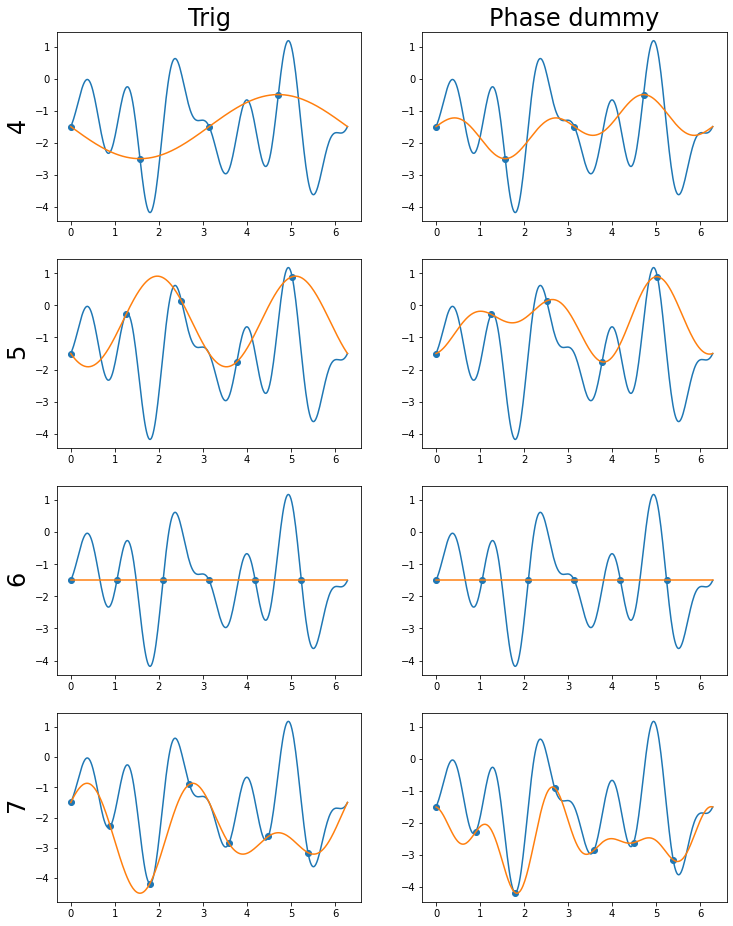

In [13]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 4, 'trig')
plt.title('Trig', fontsize=24)
plt.ylabel('$4$', fontsize=24)
plt.subplot(4, 2, 2)
plt.title('Phase dummy', fontsize=24)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 4, 'dummy')
print('')

plt.subplot(4, 2, 3)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 5, 'trig')
plt.ylabel('$5$', fontsize=24)
plt.subplot(4, 2, 4)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 5, 'dummy')
print('')

plt.subplot(4, 2, 5)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 6, 'trig')
plt.ylabel('$6$', fontsize=24)
plt.subplot(4, 2, 6)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 6, 'dummy')
print('')

plt.subplot(4, 2, 7)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 7, 'trig')
plt.ylabel('$7$', fontsize=24)
plt.subplot(4, 2, 8)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 7, 'dummy')
print('')

# plt.savefig("ns.jpg", bbox_inches="tight")

Error of the trig interpolation: 2.1094237467877974e-15
Error of the dummy interpolation: 2.872223739432727e-15
Error of the ct interpolation: 7.799998091861937e-08

Error of the trig interpolation: 7.438494264988549e-15
Error of the dummy interpolation: 7.77473259106447e-15
Error of the ct interpolation: 1.1663527366145844e-07

Error of the trig interpolation: 1.1102230246251565e-14
Error of the dummy interpolation: 2.4148818277187665e-14
Error of the ct interpolation: 1.0114300108554678e-07



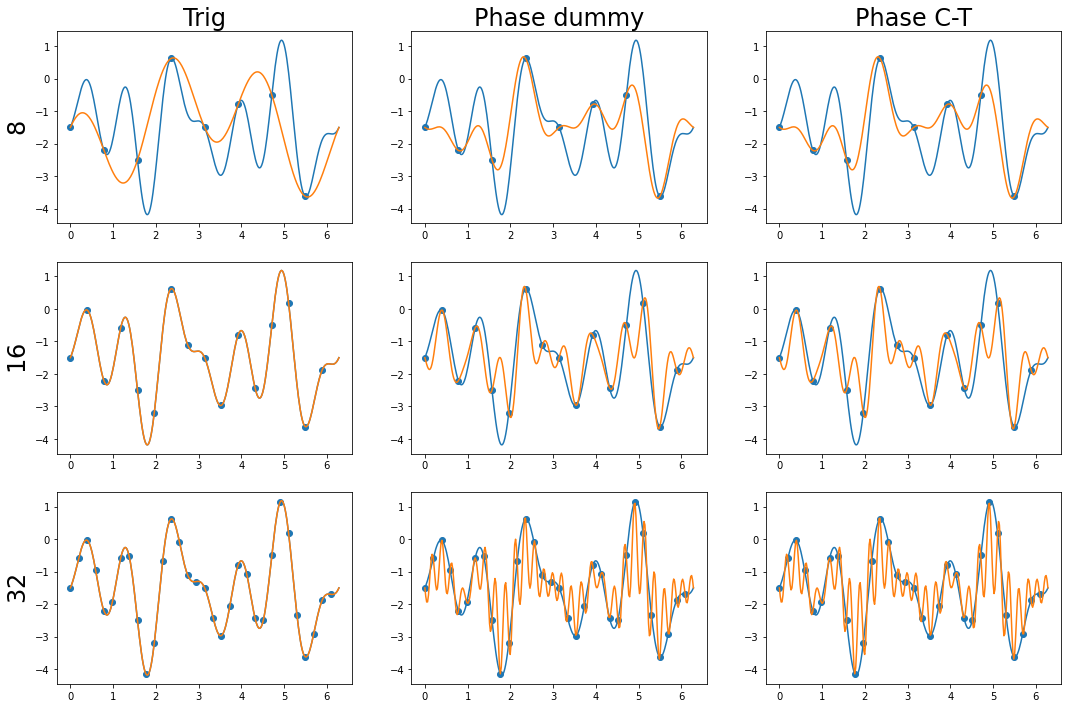

In [14]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 8, 'trig')
plt.ylabel('$8$', fontsize=24)
plt.title('Trig', fontsize=24)
plt.subplot(3, 3, 2)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 8, 'dummy')
plt.title('Phase dummy', fontsize=24)
plt.subplot(3, 3, 3)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 8, 'ct')
plt.title('Phase C-T', fontsize=24)
print('')

plt.subplot(3, 3, 4)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 16, 'trig')
plt.ylabel('$16$', fontsize=24)
plt.subplot(3, 3, 5)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 16, 'dummy')
plt.subplot(3, 3, 6)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 16, 'ct')
print('')

plt.subplot(3, 3, 7)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 32, 'trig')
plt.ylabel('$32$', fontsize=24)
plt.subplot(3, 3, 8)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 32, 'dummy')
plt.subplot(3, 3, 9)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 32, 'ct')
print('')

# plt.savefig("ns2s.jpg", bbox_inches="tight")

TrigPolynomial and PhasePolynomial generates different interpolating functions. The latter gives same functions for both calculating coefficients methods. Functions generated by TrigPolynomial are the same as given function (which is a linear combination of trigonometric functions) for partition density high enough.

Error of the trig interpolation: 4.707345624410664e-14
Error of the dummy interpolation: 8.339068350091348e-14
Error of the ct interpolation: 1.9293986142088229e-07

Error of the trig interpolation: 1.0391687510491465e-13
Error of the dummy interpolation: 2.3171458337009955e-13
Error of the ct interpolation: 1.979458110756924e-07

Error of the trig interpolation: 4.169997680492088e-13
Error of the dummy interpolation: 5.062556398341414e-13
Error of the ct interpolation: 3.2481211231785424e-07



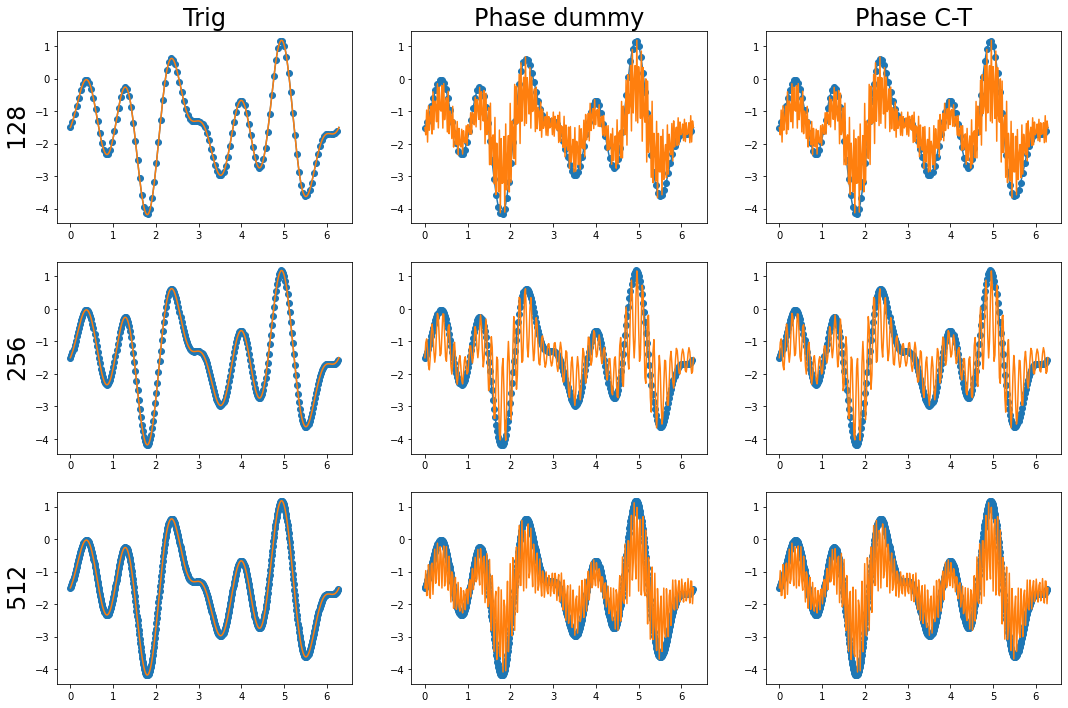

In [15]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 128, 'trig')
plt.ylabel('$128$', fontsize=24)
plt.title('Trig', fontsize=24)
plt.subplot(3, 3, 2)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 128, 'dummy')
plt.title('Phase dummy', fontsize=24)
plt.subplot(3, 3, 3)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 128, 'ct')
plt.title('Phase C-T', fontsize=24)
print('')

plt.subplot(3, 3, 4)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 256, 'trig')
plt.ylabel('$256$', fontsize=24)
plt.subplot(3, 3, 5)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 256, 'dummy')
plt.subplot(3, 3, 6)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 256, 'ct')
print('')

plt.subplot(3, 3, 7)
evaluate_and_plot_all_with_error(TrigPolynomial, f, 512, 'trig')
plt.ylabel('$512$', fontsize=24)
plt.subplot(3, 3, 8)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 512, 'dummy')
plt.subplot(3, 3, 9)
evaluate_and_plot_all_with_error(PhasePolynomial, f, 512, 'ct')
print('')

# plt.savefig("ns2s2.jpg", bbox_inches="tight")

Cooley-Tukey method's error is significantly higher (of order `e-07`) than for other two algorithms (of order `e-13`).

### Times comparison

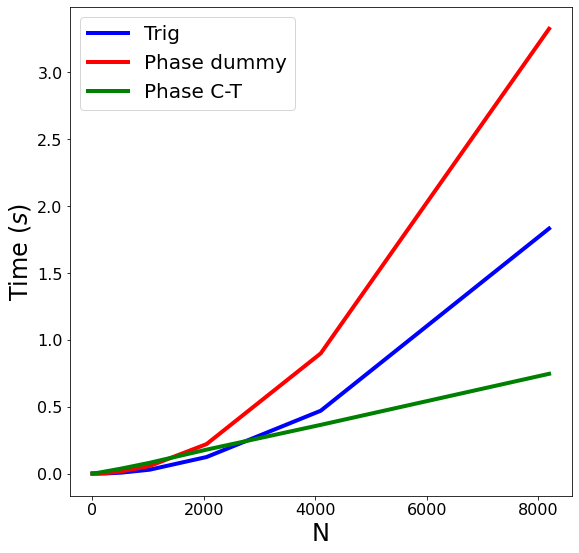

In [16]:
bundle = find_3_times(f, 1, 14)

plot_3_times(bundle)
# plt.savefig("times.jpg", bbox_inches="tight")

### Time complexity estimation

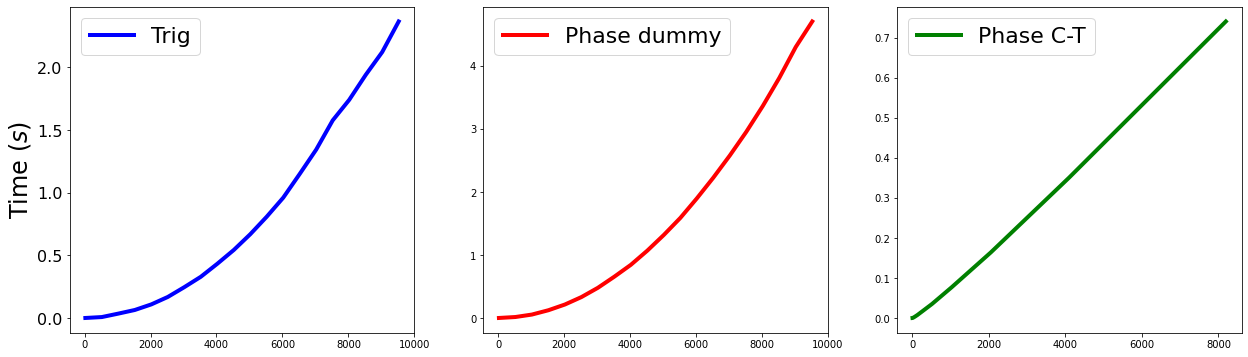

In [17]:
trig_times  = find_1_time(f, TrigPolynomial,  np.arange(25, 10000, 500))
phase_times = find_1_time(f, PhasePolynomial, np.arange(25, 10000, 500))
t_c_times   = find_1_time(f, PhasePolynomial, 2**np.arange(1, 14), t_c=True)

plot_3_times_better(trig_times, phase_times, t_c_times)
# plt.savefig("complexities.jpg", bbox_inches="tight")

---

## Remarks

* Trigonometric and phase polynomials generate different interpolating functions - the latter yields functions with more "hackly" graphs. Nevertheless, both methods - dummy and Cooley-Tukey - leads to the same results.
* Considering computation time the best is Cooley-Tokey algorithm with complexity $\mathcal{O}(n \log n)$. Dummy method and the one for "trigonometric" polynomial have quadratic complexity, the latter with less constant.
* Differences between actual values of given function and interpolating functions in partition points are of order `e-13` for "trigonometric" polynomial and dummy method for phase polynomial. Cooley-Tukey algorithm produces functions with error of order `e-07`.

---

## A little corner for experiments

### Setup

In [18]:
def do_it(f, N, ys, method):
    if method == 'trig':
        poly = TrigPolynomial()
    elif method in ('phase', 'c-t'):
        poly = PhasePolynomial()
    else:
        raise ValueError('Wrong method.')
        
    if f and N and ys is None:
        xk = 2.0*np.pi*np.arange(N)/N
        ys = np.empty(N)
        for i, x in enumerate(xk):
            ys[i] = f(x)
    elif f is None and N is None and ys is not None:
        N = ys.shape[0]
        xk = 2.0*np.pi*np.arange(N)/N
    else:
        raise ValueError('Wrong info provided.')
    
    poly.save_support_points(ys)
    
    if method == 'trig':
        poly.find_coeffs()
    elif method == 'phase':
        poly.find_coeffs_dummy()
    else:
        poly.find_coeffs_Cooley_Tukey()
    
    xs = np.linspace(0.0, 2.0*np.pi, 200)
    poly_ys = poly(xs)
        
    plt.figure(figsize=(8, 8))
    
    if f is not None:
        f_ys = np.empty(xs.shape[0])
        for i, x in enumerate(xs):
            f_ys[i] = f(x)

        plt.plot(xs, f_ys, color='blue', label='$f$')
    
    plt.plot(xs, poly_ys, color='green', label='$Interpolating polynomial$')
    plt.scatter(xk, ys)
    plt.legend()
    
    print(f'Error of the interpolation: {poly.error()}')
    return poly

### Experiments

If want to type a funtion and number of parition points of the interval $[0, 2 \pi ]$ then assing the function to `f` (can use `np.array`) and the number to `N`.
If want to specify values in points of uniform partition of $[0, 2 \pi ]$ then assign list of them to `ys`.
Assign method to `method`:
* `trig` for "trigonometric" polynomial,
* `phase` for dummy method for phase polynomial,
* `c-t` fo Cooley-Tukey algorithm for phase polynomial.

The rest should be set `None`.

Error of the interpolation: 6.841134170265661e-08


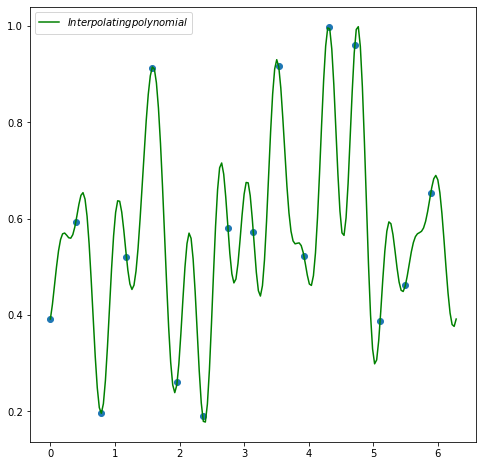

In [19]:
def g(x):
    return np.log(x+3.0) - 0.1*np.cos(1.4*x)


####################

f = None
N = None

####################

ys = np.random.rand(16)

####################

method = 'c-t'

####################



interp_function = do_it(f, N, np.array(ys) if ys is not None else ys, method)